In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve, f1_score
import matplotlib.pyplot as plt


Mounted at /content/drive


In [2]:
import pandas as pd

# Assuming your file is in Excel format, use read_excel
data = pd.read_csv('/content/drive/MyDrive/stroke/carinsu4.csv')
data.head()

ID  KIDSDRIV   AGE  HOMEKIDS   YOJ  PARENT1  MSTATUS  GENDER  \
0   63581743         0  60.0         0  11.0        0        1       0   
1  132761049         0  43.0         0  11.0        0        1       0   
2  921317019         0  48.0         0  11.0        0        1       0   
3  727598473         0  35.0         1  10.0        0        0       1   
4  450221861         0  51.0         0  14.0        0        0       0   

   EDUCATION  OCCUPATION  ...  TIF  CAR_TYPE  RED_CAR  OLDCLAIM  CLM_FREQ  \
0          3           6  ...   11         0        1    4461.0         2   
1          4           8  ...    1         0        1       0.0         0   
2          1           5  ...    1         4        1       0.0         0   
3          4           1  ...    4         5        0   38690.0         2   
4          0           8  ...    7         0        1       0.0         0   

   REVOKED  MVR_PTS  CLM_AMT  CAR_AGE  CLAIM_FLAG  
0        0        3      0.0     18.0           0  
1        0        0      0.0      1.0           0  
2        0        2      0.0     10.0           0  
3        0        3      0.0     10.0           0  
4        0        0      0.0      6.0           0  

[5 rows x 23 columns]

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/stroke/carinsu.csv')

# Identify columns with null values
columns_with_nulls = data.columns[data.isnull().any()].tolist()

# Print the column names
print("Columns with null values:", columns_with_nulls)


Columns with null values: ['AGE', 'YOJ', 'INCOME', 'HOME_VAL', 'OCCUPATION', 'CAR_AGE']


In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/stroke/carinsu.csv')

# Convert specified columns to numeric, coercing errors to NaN
columns_to_fill_mean = ['AGE', 'YOJ', 'INCOME', 'HOME_VAL', 'CAR_AGE']
for column in columns_to_fill_mean:
    data[column] = pd.to_numeric(data[column], errors='coerce')
    data[column].fillna(data[column].mean(), inplace=True)

# Handle null values in 'OCCUPATION' column by setting to '0'
data['OCCUPATION'].fillna('0', inplace=True)

# Save the modified DataFrame to a new CSV file
data.to_csv('/content/drive/MyDrive/stroke/carinsu1.csv', index=False)

# Verify the changes
print("Null values handled and file saved as 'carinsu1.csv'.")


Null values handled and file saved as 'carinsu1.csv'.


In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/stroke/carinsu1.csv')

# Identify columns with null values
columns_with_nulls = data.columns[data.isnull().any()].tolist()

# Print the column names
print("Columns with null values:", columns_with_nulls)

Columns with null values: ['INCOME', 'HOME_VAL']


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the original data
data = pd.read_csv('/content/drive/MyDrive/stroke/carinsu2.csv')

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# List of columns to be label encoded
columns_to_encode = ['PARENT1', 'MSTATUS', 'GENDER', 'EDUCATION', 'OCCUPATION', 'CAR_USE', 'CAR_TYPE', 'RED_CAR', 'REVOKED']

# Apply label encoding to the specified columns
for column in columns_to_encode:
    data[column] = label_encoder.fit_transform(data[column])

# Save the modified DataFrame to a new CSV file
data.to_csv('/content/drive/MyDrive/stroke/carinsu3.csv', index=False)

# Display the first few rows of the modified DataFrame
print(data.head())


          ID  KIDSDRIV   AGE  HOMEKIDS   YOJ  PARENT1  MSTATUS  GENDER  \
0   63581743         0  60.0         0  11.0        0        1       0   
1  132761049         0  43.0         0  11.0        0        1       0   
2  921317019         0  48.0         0  11.0        0        1       0   
3  727598473         0  35.0         1  10.0        0        0       1   
4  450221861         0  51.0         0  14.0        0        0       0   

   EDUCATION  OCCUPATION  ...  TIF  CAR_TYPE RED_CAR  OLDCLAIM  CLM_FREQ  \
0          3           6  ...   11         0       1   $4,461          2   
1          4           8  ...    1         0       1       $0          0   
2          1           5  ...    1         4       1       $0          0   
3          4           1  ...    4         5       0  $38,690          2   
4          0           8  ...    7         0       1       $0          0   

   REVOKED MVR_PTS  CLM_AMT  CAR_AGE  CLAIM_FLAG  
0        0       3      $0      18.0           

In [ ]:
import pandas as pd

# Load the data
data = pd.read_csv('/content/drive/MyDrive/stroke/carinsu3.csv')

# List of columns to remove dollar symbol and convert to numeric
columns_with_dollar = ['BLUEBOOK', 'OLDCLAIM', 'CLM_AMT']

# Remove the dollar symbol and convert to numeric
for column in columns_with_dollar:
    data[column] = data[column].replace('[\$,]', '', regex=True).astype(float)

# Save the modified DataFrame to a new CSV file
data.to_csv('/content/drive/MyDrive/stroke/carinsu4.csv', index=False)

# Verify the changes
print(data.head())


          ID  KIDSDRIV   AGE  HOMEKIDS   YOJ  PARENT1  MSTATUS  GENDER  \
0   63581743         0  60.0         0  11.0        0        1       0   
1  132761049         0  43.0         0  11.0        0        1       0   
2  921317019         0  48.0         0  11.0        0        1       0   
3  727598473         0  35.0         1  10.0        0        0       1   
4  450221861         0  51.0         0  14.0        0        0       0   

   EDUCATION  OCCUPATION  ...  TIF  CAR_TYPE  RED_CAR  OLDCLAIM  CLM_FREQ  \
0          3           6  ...   11         0        1    4461.0         2   
1          4           8  ...    1         0        1       0.0         0   
2          1           5  ...    1         4        1       0.0         0   
3          4           1  ...    4         5        0   38690.0         2   
4          0           8  ...    7         0        1       0.0         0   

   REVOKED  MVR_PTS  CLM_AMT  CAR_AGE  CLAIM_FLAG  
0        0        3      0.0     18.0   

In [3]:
# Split features and target
X = data.drop('CLAIM_FLAG', axis=1)
y = data['CLAIM_FLAG']

# Display the encoded dataset
print(X)
print(y)


              ID  KIDSDRIV   AGE  HOMEKIDS   YOJ  PARENT1  MSTATUS  GENDER  \
0       63581743         0  60.0         0  11.0        0        1       0   
1      132761049         0  43.0         0  11.0        0        1       0   
2      921317019         0  48.0         0  11.0        0        1       0   
3      727598473         0  35.0         1  10.0        0        0       1   
4      450221861         0  51.0         0  14.0        0        0       0   
...          ...       ...   ...       ...   ...      ...      ...     ...   
10297   67790126         1  45.0         2   9.0        0        0       0   
10298   61970712         0  46.0         0   9.0        0        0       0   
10299  849208064         0  48.0         0  15.0        0        0       1   
10300  627828331         0  50.0         0   7.0        0        0       1   
10301  680381960         0  52.0         0  11.0        0        0       1   

       EDUCATION  OCCUPATION  ...  BLUEBOOK  TIF  CAR_TYPE  RED

In [4]:
# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

Class distribution in predictions: [1219  842]
Accuracy: 0.5570111596312469
Precision: 0.28741092636579574
Recall: 0.436036036036036
F1-score: 0.34645669291338577
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.60      0.66      1506
           1       0.29      0.44      0.35       555

    accuracy                           0.56      2061
   macro avg       0.52      0.52      0.51      2061
weighted avg       0.62      0.56      0.58      2061



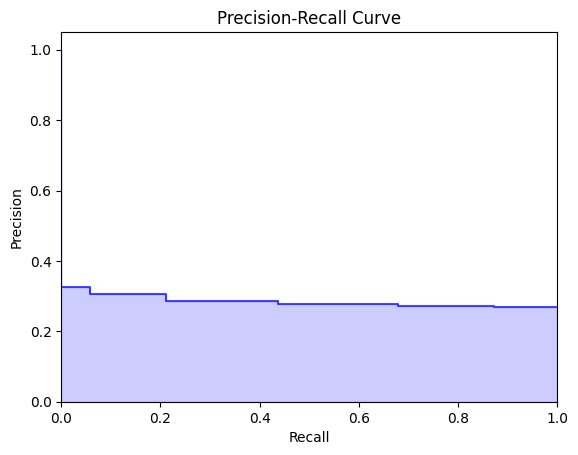

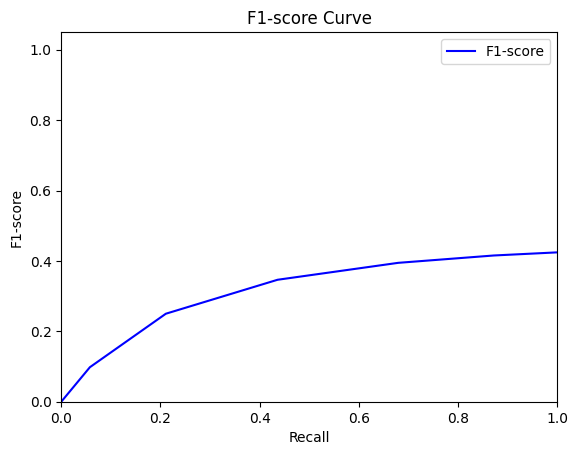

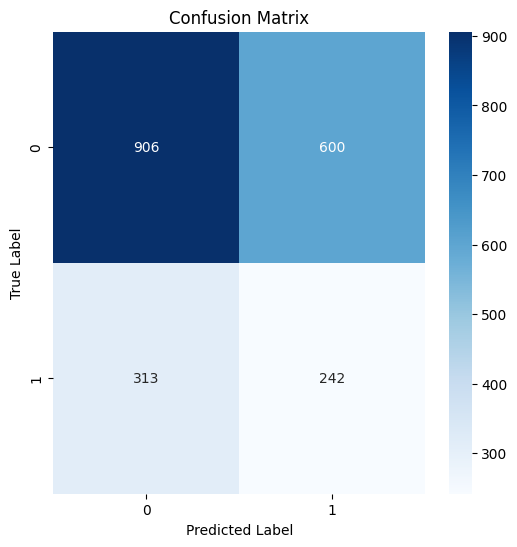

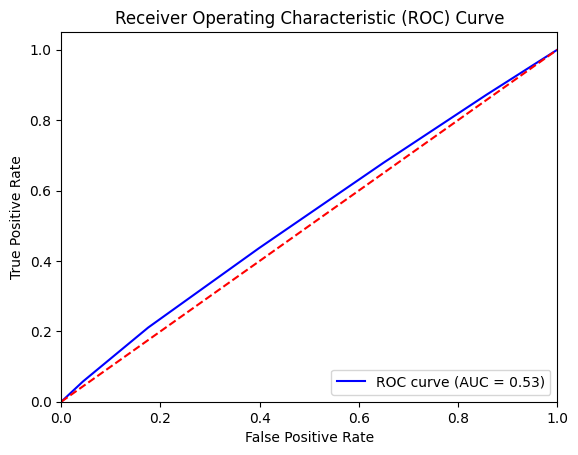

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, precision_recall_curve, roc_curve, auc, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Apply SMOTE to balance the class distribution
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the KNN classifier with desired parameters
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors as needed

# Train the model on the resampled dataset
knn.fit(X_train_resampled, y_train_resampled)

# Model testing and evaluation
y_pred = knn.predict(X_test)

# Check for class imbalance in predictions
pred_distribution = np.bincount(y_pred)
print("Class distribution in predictions:", pred_distribution)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Generate and print classification report
class_report = classification_report(y_test, y_pred, zero_division=0)
print("Classification Report:")
print(class_report)

# Plot Precision-Recall curve
y_pred_probs = knn.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_pred_probs)

plt.step(recall, precision, color='b', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

# Plot F1-score curve
f1_values = 2 * (precision * recall) / (precision + recall)
plt.plot(recall, f1_values, color='b', label='F1-score')
plt.xlabel('Recall')
plt.ylabel('F1-score')
plt.title('F1-score Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend()
plt.show()

# Plot Confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='b', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Class distribution in predictions: [1525  536]
Accuracy: 0.9733139252789907
Precision: 0.9664179104477612
Recall: 0.9333333333333333
F1-score: 0.9495875343721356
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1506
           1       0.97      0.93      0.95       555

    accuracy                           0.97      2061
   macro avg       0.97      0.96      0.97      2061
weighted avg       0.97      0.97      0.97      2061



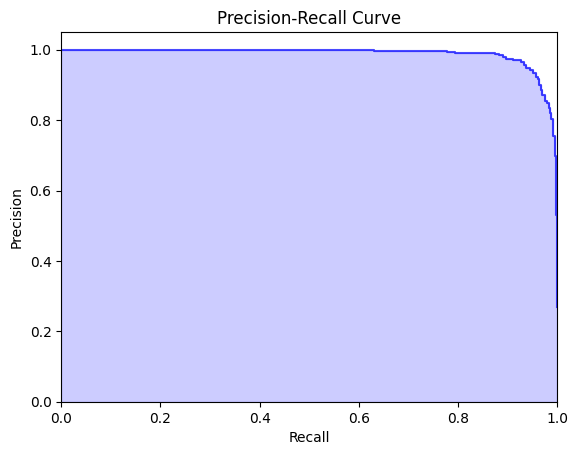

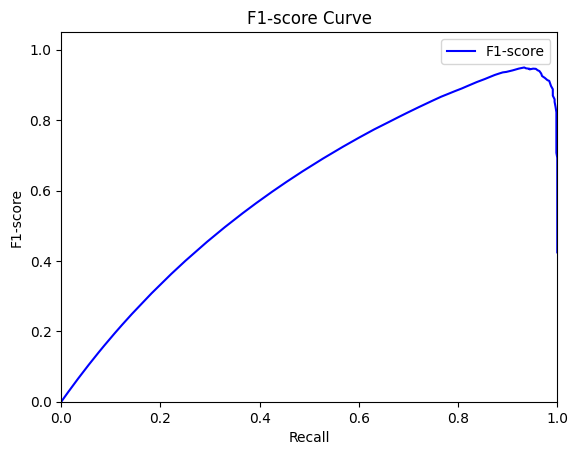

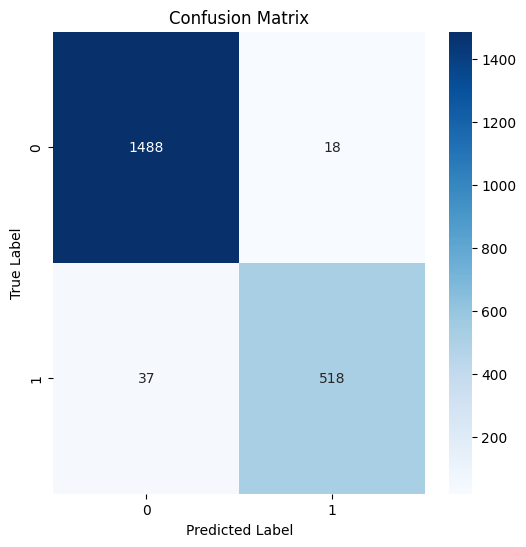

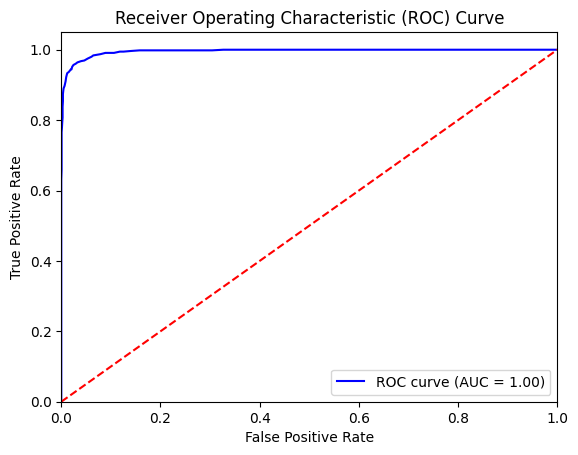

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, precision_recall_curve, roc_curve, auc, confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Apply SMOTE to balance the class distribution
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the Extra Trees Classifier with desired parameters
extra_trees = ExtraTreesClassifier(n_estimators=100, random_state=42)  # You can adjust parameters as needed

# Train the model on the resampled dataset
extra_trees.fit(X_train_resampled, y_train_resampled)

# Model testing and evaluation
y_pred = extra_trees.predict(X_test)

# Check for class imbalance in predictions
pred_distribution = np.bincount(y_pred)
print("Class distribution in predictions:", pred_distribution)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Generate and print classification report
class_report = classification_report(y_test, y_pred, zero_division=0)
print("Classification Report:")
print(class_report)

# Plot Precision-Recall curve
y_pred_probs = extra_trees.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_pred_probs)

plt.step(recall, precision, color='b', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

# Plot F1-score curve
f1_values = 2 * (precision * recall) / (precision + recall)
plt.plot(recall, f1_values, color='b', label='F1-score')
plt.xlabel('Recall')
plt.ylabel('F1-score')
plt.title('F1-score Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend()
plt.show()

# Plot Confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='b', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [21]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression classifier
logistic_regression = LogisticRegression()

# Train the model
logistic_regression.fit(X_train, y_train)


LogisticRegression()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy: 0.7307132459970888
Precision: 0.5
Recall: 0.0018018018018018018
F1-score: 0.003590664272890485
Classification Report:
              precision    recall  f1-score   support

           0       0.73      1.00      0.84      1506
           1       0.50      0.00      0.00       555

    accuracy                           0.73      2061
   macro avg       0.62      0.50      0.42      2061
weighted avg       0.67      0.73      0.62      2061



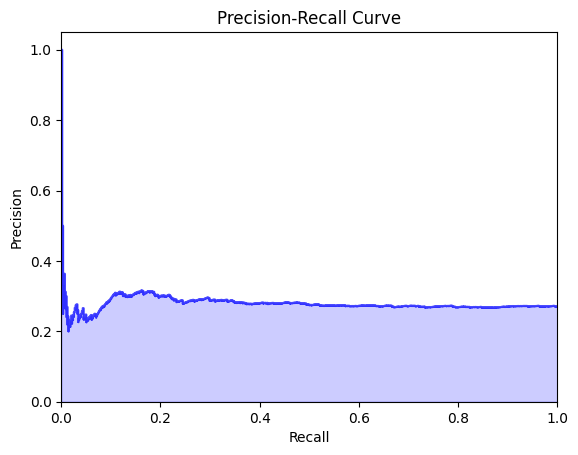

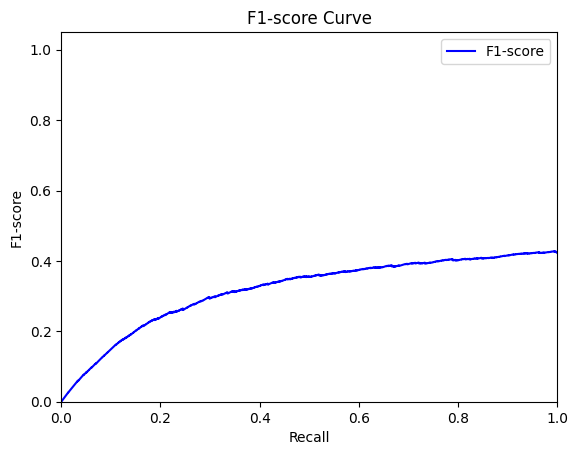

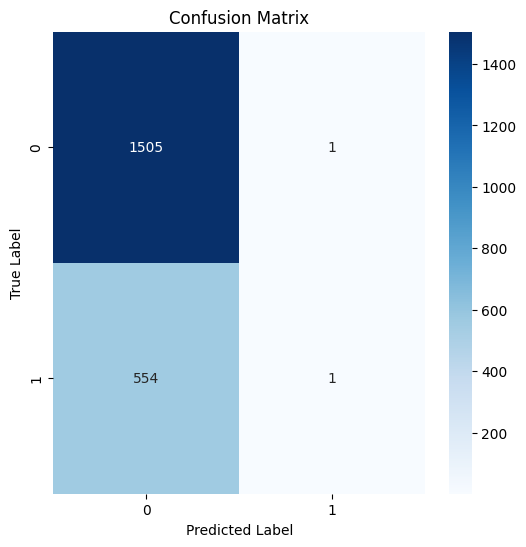

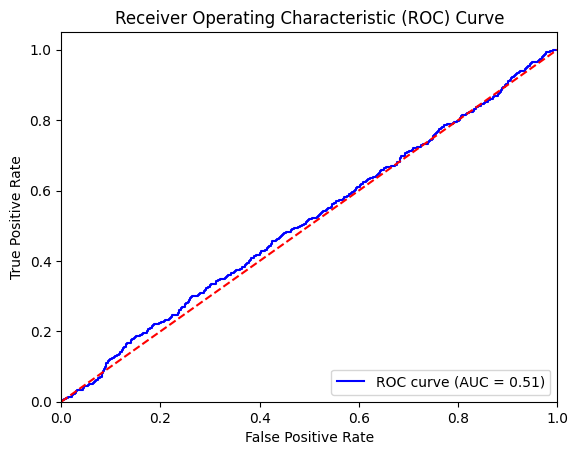

In [22]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, precision_recall_curve, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression classifier with hyperparameters
logistic_regression = LogisticRegression(C=1.0, penalty='l2', solver='saga', random_state=42, class_weight='balanced')

# Train the model
logistic_regression.fit(X_train, y_train)

# Model testing and evaluation
y_pred = logistic_regression.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Generate and print classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Plot Precision-Recall curve
y_pred_probs = logistic_regression.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_pred_probs)

plt.step(recall, precision, color='b', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

# Plot F1-score curve
f1_values = 2 * (precision * recall) / (precision + recall)
plt.plot(recall, f1_values, color='b', label='F1-score')
plt.xlabel('Recall')
plt.ylabel('F1-score')
plt.title('F1-score Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend()
plt.show()

# Plot Confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='b', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
